In [1]:
student_table = {
    '1':12.706,
    '2':4.3027,
    '3':3.1825,
    '4':2.7764,
    '5':2.5706,
    '6':2.4469,
    '7':2.3646,
    '8':2.3060,
    '9':2.2622,
    '10':2.2281,
    '11':2.2010,
    '12':2.1788,
    '13':2.1604,
    '14':2.1448,
    '15':2.1315
}

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.array([79, 106, 106, 67, 98])
y = np.array([154, 157, 195, 139, 158])
y_avg = np.average(y)
x_avg = np.average(x)
Y = np.round(np.log10(y),4)
Y_avg = np.round(np.average(Y), 4)
B = np.round((np.cov(x,Y)[0, 1]/np.cov(x,x)[0, 1]), 5)
b = 10 ** B
C = Y_avg - B*x_avg
a = np.round((10**C), 3)
reg = a * (b ** x)
A = np.round((np.abs((y-reg)/y) * 100) , 2)

data = {
    'x':x,
    'y':y,
    'xy':x*y,
    'x^2':x**2,
    '(x-x_avg)^2': np.round(((x-x_avg)**2), 2),
    '(y-y_avg)^2':  np.round(((y-y_avg)**2), 2),
    'Y': Y,
    'x*Y': x * Y,
    'regression' : np.round(reg, 2),
    'y-reg': np.round((y - reg), 2),
    '(y-reg)^2': np.round(((y - reg) ** 2), 2),
    'appr': A    
}
df = pd.DataFrame(data)
sum_row = df.sum()
mean_row = df.mean()

# Создаем DataFrame из новых строк
sum_df = pd.DataFrame(sum_row).T
mean_df = pd.DataFrame(mean_row).T

# Устанавливаем индексы для строк с суммой и средним
sum_df.index = ['Sum']
mean_df.index = ['Mean']

# Присоединяем строки к исходному DataFrame
df = pd.concat([df, sum_df, mean_df])
df = df.round(2)

# Индекс корреляции (ро xy)
corr_ind = np.round((np.sqrt(1 - (np.sum(np.round(((y - reg) ** 2), 2))/ 
                                  np.sum(np.round(((y-y_avg)**2), 2))))), 4)

# Детерминация 
R = np.round(corr_ind**2, 4)

# Коэфициент эластичности
elast = x_avg * np.log(b)

# beta-коэфициент
# beta = b * (sigma_x / sigma_y)
n = len(x)
sigma_x = np.sqrt(df.loc['Sum', '(x-x_avg)^2'] / n)
sigma_y = np.sqrt(df.loc['Sum', '(y-y_avg)^2'] / n)
beta = b * (sigma_x/sigma_y)

# F-критерий Фишера
m = 1 # число степеней свободы
F = np.round((R / (1-R)) * ((n- m - 1) / m), 2)

# Остаточная диспресия
S_rem = df.loc['Sum', '(y-reg)^2'] / (n - 2)

# Стандартные ошибки
ma = np.sqrt(S_rem) * (np.sqrt(df.loc['Sum', 'x^2']) / (sigma_x * n))
ta = a / ma

mb = np.sqrt(S_rem) / (sigma_x * np.sqrt(n))
tb = b / mb

mrxy = np.sqrt((1 - R) / (n - 2))
trxy = corr_ind / mrxy

# Доверительный интервал по a и b
# число степеней свободы = n - (кол-во x) - 1 
t_tab = student_table[str(n-1-1)]
da = ma * t_tab
db = mb * t_tab
trust_int_a = (a - da, a + da)
trust_int_b = (b - db, b + db)

# Прогноз
forecast = 1.234
x_forecast = x_avg * forecast
reg_forecast = a * (b ** x_forecast)
mreg_forecast = np.sqrt(S_rem * (1 + (1/n) + (((x_forecast - x_avg)**2)/df.loc['Sum', '(x-x_avg)^2'])))
dreg_forecast = mreg_forecast * t_tab
trust_int_reg_forecast = (reg_forecast - dreg_forecast, reg_forecast + dreg_forecast)

In [3]:
df

,x,y,xy,x^2,(x-x_avg)^2,(y-y_avg)^2,Y,x*Y,regression,y-reg,(y-reg)^2,appr
0,79.0,154.0,12166.0,6241.0,148.84,43.56,2.19,172.81,149.64,4.36,18.97,2.83
1,106.0,157.0,16642.0,11236.0,219.04,12.96,2.20,232.77,172.54,-15.54,241.49,9.90
2,106.0,195.0,20670.0,11236.0,219.04,1183.36,2.29,242.74,172.54,22.46,504.45,11.52
3,67.0,139.0,9313.0,4489.0,585.64,466.56,2.14,143.58,140.47,-1.47,2.16,1.06
4,98.0,158.0,15484.0,9604.0,46.24,6.76,2.20,215.47,165.41,-7.41,54.95,4.69
Sum,456.0,803.0,74275.0,42806.0,1218.80,1713.20,11.02,1007.37,800.60,2.40,822.02,30.00
Mean,91.2,160.6,14855.0,8561.2,243.76,342.64,2.20,201.47,160.12,0.48,164.40,6.00


In [4]:
# 1-я группа 
print(corr_ind)
print(R)
print(elast)
print(beta)

0.7212
0.5201
0.48089029150162654
0.8479147495355821


In [5]:
# 2-я группа
print(F)
print(S_rem)

3.25
274.00666666666666


In [6]:
# 3-я группа (стандартные ошибки)
print(ma)
print(ta)
print()
print(mb)
print(tb)
print()
print(mrxy)
print(trxy)

43.87141715003556
2.2488901979752898

0.47414845739947825
2.120194277727245

0.39995833116296836
1.8031878418507987


In [7]:
# 4-я группа (доверительные интервалы)
print(trust_int_a)
print(trust_int_b)

(-40.95878507998816, 238.28278507998817)
(-0.5036906195022655, 2.5142643118454133)


In [8]:
# 5-я группа (прогноз)
print(x_forecast)
print(reg_forecast)
print(mreg_forecast)
print(trust_int_reg_forecast)

112.5408
178.59460966735725
20.76526521478
(112.5091531213199, 244.68006621339458)


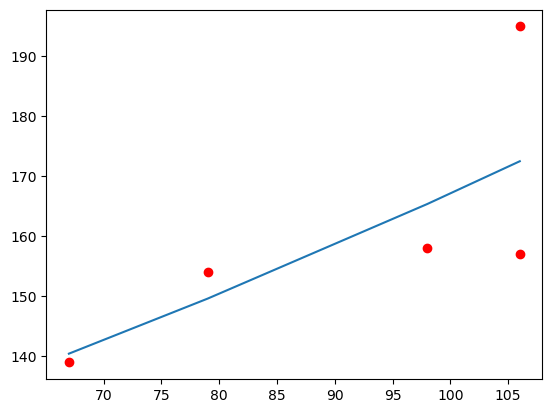

In [9]:
sorted_indexes = np.argsort(x)
x_sorted = x[sorted_indexes]
reg_sorted = reg[sorted_indexes]
plt.plot(x_sorted, reg_sorted)
plt.scatter(x, y, color='red')
plt.show()